In [23]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [24]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [25]:
NUM_CLASSES = 7

# Dataset reading

In [26]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [27]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [29]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [30]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_2 (Dropout)          (None, 42)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 20)                860       
_________________________________________________________________
dropout_3 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_5 (Dense)              (None, 7)                 77        
Total params: 1,147
Trainable params: 1,147
Non-trainable params: 0
_________________________________________________________________


In [31]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [32]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [33]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
20/20 [==============================] - 0s 10ms/step - loss: 1.9429 - accuracy: 0.1375 - val_loss: 1.8522 - val_accuracy: 0.2415

Epoch 00001: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 2/1000
20/20 [==============================] - 0s 5ms/step - loss: 1.8325 - accuracy: 0.2380 - val_loss: 1.7230 - val_accuracy: 0.4099

Epoch 00002: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 3/1000
20/20 [==============================] - 0s 4ms/step - loss: 1.7175 - accuracy: 0.3547 - val_loss: 1.5703 - val_accuracy: 0.5465

Epoch 00003: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 4/1000
20/20 [==============================] - 0s 5ms/step - loss: 1.5896 - accuracy: 0.4430 - val_loss: 1.4161 - val_accuracy: 0.5724

Epoch 00004: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 5/1000
20/20 [==============================] - 0s 4ms/step - loss: 1.4480 - accuracy: 0.5094 - val_l


Epoch 00037: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 38/1000
20/20 [==============================] - 0s 4ms/step - loss: 0.6366 - accuracy: 0.7494 - val_loss: 0.3609 - val_accuracy: 0.8952

Epoch 00038: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 39/1000
20/20 [==============================] - 0s 4ms/step - loss: 0.6302 - accuracy: 0.7459 - val_loss: 0.3518 - val_accuracy: 0.8893

Epoch 00039: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 40/1000
20/20 [==============================] - 0s 4ms/step - loss: 0.6803 - accuracy: 0.7313 - val_loss: 0.3503 - val_accuracy: 0.8822

Epoch 00040: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 41/1000
20/20 [==============================] - 0s 4ms/step - loss: 0.6248 - accuracy: 0.7490 - val_loss: 0.3446 - val_accuracy: 0.8987

Epoch 00041: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 42/1000
20/20 [==

20/20 [==============================] - 0s 4ms/step - loss: 0.5299 - accuracy: 0.7848 - val_loss: 0.2401 - val_accuracy: 0.9494

Epoch 00074: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 75/1000
20/20 [==============================] - 0s 4ms/step - loss: 0.5191 - accuracy: 0.7918 - val_loss: 0.2379 - val_accuracy: 0.9588

Epoch 00075: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 76/1000
20/20 [==============================] - 0s 4ms/step - loss: 0.5172 - accuracy: 0.7910 - val_loss: 0.2352 - val_accuracy: 0.9600

Epoch 00076: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 77/1000
20/20 [==============================] - 0s 5ms/step - loss: 0.4961 - accuracy: 0.7997 - val_loss: 0.2306 - val_accuracy: 0.9552

Epoch 00077: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 78/1000
20/20 [==============================] - 0s 5ms/step - loss: 0.5169 - accuracy: 0.7922 - val_loss: 0.230


Epoch 00110: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 111/1000
20/20 [==============================] - 0s 4ms/step - loss: 0.4648 - accuracy: 0.8079 - val_loss: 0.1932 - val_accuracy: 0.9670

Epoch 00111: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 112/1000
20/20 [==============================] - 0s 4ms/step - loss: 0.4623 - accuracy: 0.8225 - val_loss: 0.1904 - val_accuracy: 0.9753

Epoch 00112: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 113/1000
20/20 [==============================] - 0s 4ms/step - loss: 0.4579 - accuracy: 0.8126 - val_loss: 0.1919 - val_accuracy: 0.9670

Epoch 00113: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 114/1000
20/20 [==============================] - 0s 5ms/step - loss: 0.4563 - accuracy: 0.8217 - val_loss: 0.1954 - val_accuracy: 0.9694

Epoch 00114: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 115/1000
20/2

20/20 [==============================] - 0s 4ms/step - loss: 0.4371 - accuracy: 0.8229 - val_loss: 0.1892 - val_accuracy: 0.9682

Epoch 00147: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 148/1000
20/20 [==============================] - 0s 5ms/step - loss: 0.4207 - accuracy: 0.8382 - val_loss: 0.1816 - val_accuracy: 0.9776

Epoch 00148: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 149/1000
20/20 [==============================] - 0s 5ms/step - loss: 0.4121 - accuracy: 0.8370 - val_loss: 0.1844 - val_accuracy: 0.9647

Epoch 00149: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 150/1000
20/20 [==============================] - 0s 5ms/step - loss: 0.4390 - accuracy: 0.8178 - val_loss: 0.1808 - val_accuracy: 0.9694

Epoch 00150: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 151/1000
20/20 [==============================] - 0s 5ms/step - loss: 0.4157 - accuracy: 0.8323 - val_loss: 0


Epoch 00183: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 184/1000
20/20 [==============================] - 0s 4ms/step - loss: 0.3986 - accuracy: 0.8500 - val_loss: 0.1700 - val_accuracy: 0.9682

Epoch 00184: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 185/1000
20/20 [==============================] - 0s 4ms/step - loss: 0.3984 - accuracy: 0.8382 - val_loss: 0.1803 - val_accuracy: 0.9458

Epoch 00185: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 186/1000
20/20 [==============================] - 0s 4ms/step - loss: 0.3647 - accuracy: 0.8507 - val_loss: 0.1754 - val_accuracy: 0.9706

Epoch 00186: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 00186: early stopping


In [34]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

7/7 [==============================] - 0s 3ms/step - loss: 0.1754 - accuracy: 0.9706


In [35]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [36]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

[7.9936343e-01 3.8236272e-02 8.7209924e-07 1.6182344e-10 1.6048771e-01
 1.8534398e-03 5.8275393e-05]
0


# Confusion matrix

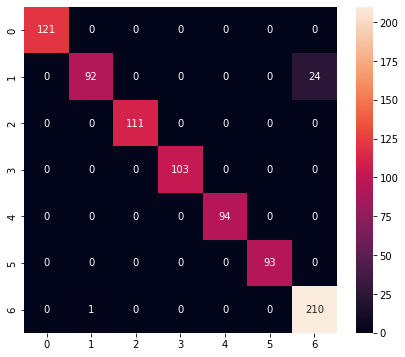

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       121
           1       0.99      0.79      0.88       116
           2       1.00      1.00      1.00       111
           3       1.00      1.00      1.00       103
           4       1.00      1.00      1.00        94
           5       1.00      1.00      1.00        93
           6       0.90      1.00      0.94       211

    accuracy                           0.97       849
   macro avg       0.98      0.97      0.97       849
weighted avg       0.97      0.97      0.97       849



In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [38]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [39]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\Asus\AppData\Local\Temp\tmpsux2c34i\assets


INFO:tensorflow:Assets written to: C:\Users\Asus\AppData\Local\Temp\tmpsux2c34i\assets


6544

# Inference test

In [40]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [41]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [42]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [43]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

Wall time: 916 µs


In [44]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[7.9936343e-01 3.8236286e-02 8.7209918e-07 1.6182343e-10 1.6048762e-01
 1.8534397e-03 5.8275451e-05]
0
